### Installation and configuration

In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!apt install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
ls /gdrive

MyDrive/


In [ ]:
!unrar x /gdrive/MyDrive/Keyword_spotting_dataset.rar

In [ ]:
ls

data_17042021/  sample_data/


In [ ]:
!mv data_17042021 data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import random 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from pydub import AudioSegment
import tensorflow_hub as hub

### Data ingestion and exploratory data analysis

In [ ]:
metadata = pd.read_excel("./data/clips.xlsx")

In [ ]:
metadata.shape

(24653, 8)

In [ ]:
metadata.head().T

,0,1,2,3,4
id,1,2,3,4,5
client_id,0e183bb3-5449-48d5-b5b8-9c0b19d55f02,0e183bb3-5449-48d5-b5b8-9c0b19d55f02,0e183bb3-5449-48d5-b5b8-9c0b19d55f02,0e183bb3-5449-48d5-b5b8-9c0b19d55f02,0e183bb3-5449-48d5-b5b8-9c0b19d55f02
path,0e183bb3-5449-48d5-b5b8-9c0b19d55f02/e9e9661cb...,0e183bb3-5449-48d5-b5b8-9c0b19d55f02/02a670ba9...,0e183bb3-5449-48d5-b5b8-9c0b19d55f02/dda43373b...,0e183bb3-5449-48d5-b5b8-9c0b19d55f02/c0cd07156...,0e183bb3-5449-48d5-b5b8-9c0b19d55f02/9cc6f1ad7...
sentence,O ɓox,Ƥetaa-naxak,A ñaaƴ,Tadik,Xarɓaxay
original_sentence_id,e9e9661cbf9855949c094f6de4001dc1b19ed761c2ea5c...,02a670ba96f24cf45750adc406799c79b3e03f7dc76d97...,dda43373b34abed8f54a694a161240e010488d17ad6bf9...,c0cd0715685c2ce27277b01f4f6a141027bc56ebf3b6f4...,9cc6f1ad7b4559ccd62a51ca6dde93ff82604eff3f696e...
created_at,2021-01-15 10:44:05,2021-01-15 10:44:07,2021-01-15 10:44:09,2021-01-15 10:44:11,2021-01-15 10:44:14
bucket,train,train,train,train,train
locale_id,6,6,6,6,6


In [ ]:
metadata.sentence.value_counts()

Tus (0)             427
Doxal (Marche)      382
Juroom-ñett (8)     382
Ci kanam (Avant)    381
Juroom-ñeent (9)    381
                   ... 
Karago (5)            1
Xobo (Acheter)        1
Gaaga (Vendre)        1
Wulle (Chien)         1
Tammu (10)            1
Name: sentence, Length: 415, dtype: int64

In [ ]:
metadata.sentence.nunique()

415

<AxesSubplot: >

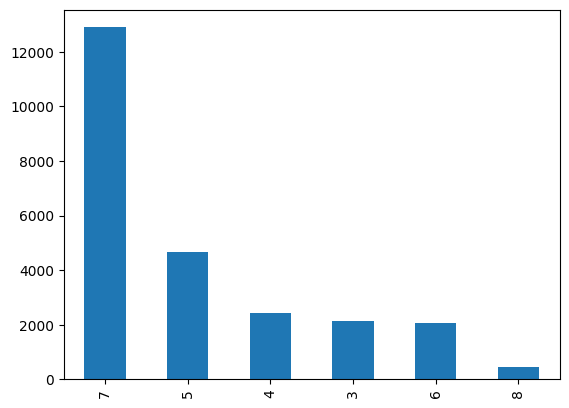

In [ ]:
metadata.locale_id.value_counts().plot(kind="bar")

In [ ]:
wolof_data = metadata[metadata["locale_id"] == 7]

In [ ]:
top_10_words = wolof_data.sentence.value_counts().iloc[:10].index
top_10_words

Index(['Doxal (Marche)', 'Juroom-ñett (8)', 'Ci kanam (Avant)',
       'Juroom-ñeent (9)', 'Xaj (Chien)', 'Ci suuf (Bas)',
       'Milyoŋ (1 000 000)', 'Fanweer (30)', 'Juroom (5)', 'Ak (Et)'],
      dtype='object')

In [ ]:
wolof_data = wolof_data[wolof_data.sentence.isin(top_10_words)]

In [ ]:
wolof_data.shape

(3804, 8)

In [ ]:
wolof_data.sentence.nunique()

10

In [ ]:
wolof_data.client_id.nunique()

397

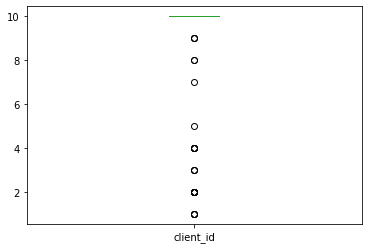

In [ ]:
wolof_data.client_id.value_counts().plot(kind="box")

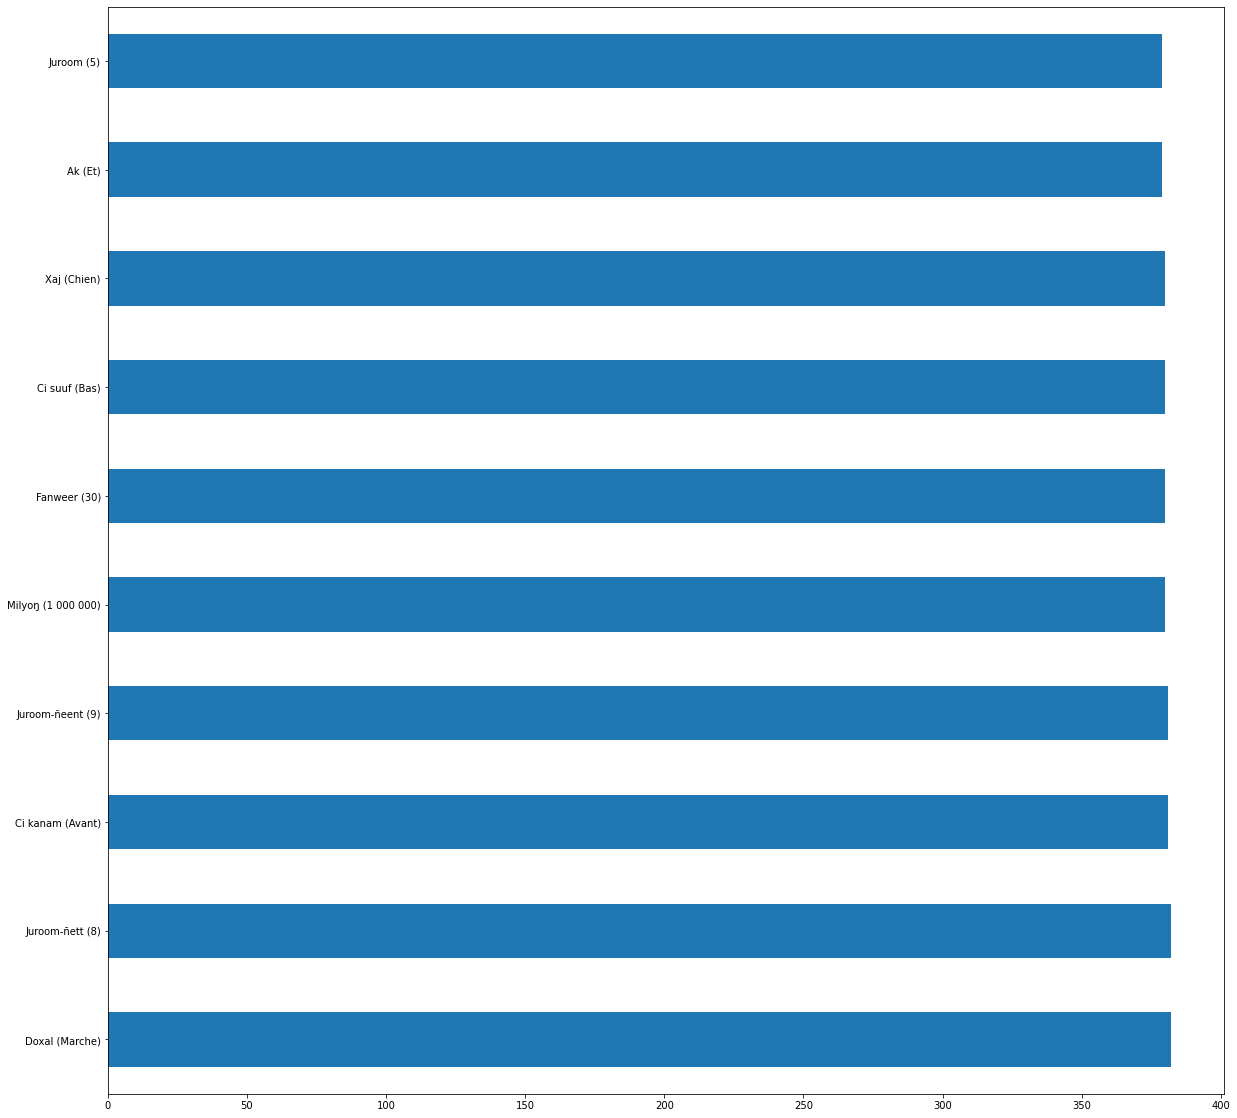

In [ ]:
plt.figure(figsize=(20,20))
wolof_data.sentence.value_counts().plot(kind="barh")

In [ ]:
wolof_data.path.iloc[0]

'7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/269d41d0b9c7fde416800c18e783681bb47c13eb2e779dbb1e2512e973c46adf.mp3'

In [ ]:
random_audio = random.randint(0, len(wolof_data))
print(wolof_data.sentence.iloc[random_audio])
ipd.Audio(f"data/{wolof_data.path.iloc[random_audio]}")

Doxal (Marche)


In [ ]:
wolof_data.head()

,id,client_id,path,sentence,original_sentence_id,created_at,bucket,locale_id
1495,1844,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/269d41d0b...,Milyoŋ (1 000 000),269d41d0b9c7fde416800c18e783681bb47c13eb2e779d...,2021-02-20 20:53:45,train,7
1500,1849,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/5f0d1a5a5...,Fanweer (30),5f0d1a5a518752f7c350a88c0033a7c2888d3870228bca...,2021-02-20 20:54:57,train,7
1504,1853,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/73b5693cc...,Doxal (Marche),73b5693cc877448813f191ffd3910f9d4b835ae5c15cb3...,2021-02-20 20:55:26,train,7
1505,1854,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea,7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/3b0b8160b...,Ci kanam (Avant),3b0b8160b765d7ba5ed3fda246dc24c4e4e59f3a794bc0...,2021-02-20 20:55:36,train,7
1543,1909,99e581cc-45db-415b-8c47-5c8445027e48,99e581cc-45db-415b-8c47-5c8445027e48/f6eeb64cd...,Juroom-ñett (8),f6eeb64cd13430773743e74cfc9dd5026ad1904e8c7826...,2021-02-20 21:06:52,train,7


In [ ]:
index_to_command = {i:command for i,command in enumerate(wolof_data.sentence.unique())}
command_to_index = {y: x for x, y in index_to_command.items()}

In [ ]:
index_to_command

{0: 'Milyoŋ (1 000 000)',
 1: 'Fanweer (30)',
 2: 'Doxal (Marche)',
 3: 'Ci kanam (Avant)',
 4: 'Juroom-ñett (8)',
 5: 'Ci suuf (Bas)',
 6: 'Juroom-ñeent (9)',
 7: 'Ak (Et)',
 8: 'Xaj (Chien)',
 9: 'Juroom (5)'}

In [ ]:
wolof_data["label"] = wolof_data.sentence.apply(lambda command: command_to_index[command])

In [ ]:
wolof_data.drop(columns=["id", "client_id", "sentence", "original_sentence_id", "created_at", "bucket", "locale_id"], inplace=True)

In [ ]:
wolof_data.path = "data/"+wolof_data.path

In [ ]:
wolof_data.head()

,path,label
1495,data/7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/269d...,0
1500,data/7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/5f0d...,1
1504,data/7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/73b5...,2
1505,data/7c7d3dc1-f50c-4b56-a9fa-09bce238a5ea/3b0b...,3
1543,data/99e581cc-45db-415b-8c47-5c8445027e48/f6ee...,4


In [ ]:
train_df,val_df = train_test_split(wolof_data, test_size=0.1, stratify=wolof_data["label"], shuffle=True, random_state=42)

In [ ]:
train_df.shape, val_df.shape

((3423, 2), (381, 2))

### Data generator

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, df, batch_size,max_duration, sample_rate = 16_000):
        self.df = df
        self.batch_size = batch_size
        self.sample_rate = sample_rate
        self.max_samples = max_duration * sample_rate
        

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        batch_df = self.df.iloc[index*self.batch_size : (index+1)*self.batch_size]

        # Find list of IDs

        # Generate data
        X, y = self.__data_generation(batch_df)

        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        self.df = self.df.sample(frac=1.0)

    def __data_generation(self, batch_df):
        X = np.empty((self.batch_size, self.max_samples))
        Y = np.empty((self.batch_size), dtype=int)
        # Generate data
        i = 0
        for _, row in batch_df.iterrows():
            path, label = row.path, row.label
            try:
                audio = AudioSegment.from_mp3(path)
                audio = audio.set_frame_rate(self.sample_rate)
                audio = audio.get_array_of_samples()
                audio = 2.*(audio - np.min(audio))/np.ptp(audio)-1
                if audio.shape[0] >  self.max_samples:
                    waveform = audio[0: self.max_samples]
                else:
                    waveform = np.concatenate((audio, np.zeros((self.max_samples - audio.shape[0],))))
                X[i, ] = waveform
                Y[i] = label
                i += 1
            except:
                i += 1
        return X.squeeze(), Y

In [ ]:
train_gen = DataGenerator(train_df, 32, max_duration=4)
valid_gen = DataGenerator(val_df, 32, max_duration=4)

In [ ]:
for x in train_gen:
    # print(x[0].squeeze().shape)
    print(x[0].shape, x[1].shape)
    break

(32, 64000) (32,)


### Model creation and training

In [ ]:
import tensorflow_hub as hub

trill_layer = hub.KerasLayer(
    # handle='https://tfhub.dev/google/nonsemantic-speech-benchmark/trill-distilled/3',
    handle='https://tfhub.dev/google/nonsemantic-speech-benchmark/trill/3',
    trainable=True,
    # arguments={'sample_rate': tf.constant(16000, tf.int32)},
    arguments={'sample_rate': 16000},
    output_key='embedding',
    output_shape=[None, 2048],
    name='trill_layer'
)

In [ ]:
tf.__version__, np.__version__

('2.6.2', '1.19.5')

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(None,)))
model.add(trill_layer)
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(len(index_to_command), 
            kernel_regularizer=tf.keras.regularizers.l2(0.01)))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
trill_layer (KerasLayer)     (None, None, 512)         24524288  
_________________________________________________________________
global_average_pooling1d_4 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 24,529,418
Trainable params: 24,529,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].trainable = True

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
trill_layer (KerasLayer)     (None, None, 512)         24524288  
_________________________________________________________________
global_average_pooling1d_4 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 24,529,418
Trainable params: 24,529,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
# define the checkpoint
filepath = "models/second_freezed.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [checkpoint, es_callback]

In [ ]:
EPOCHS = 100
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=EPOCHS,
    callbacks=callbacks_list
  
)

Epoch 1/100
106/106 [==============================] - 785s 7s/step - loss: 2.4872 - accuracy: 0.1353 - val_loss: 2.4616 - val_accuracy: 0.1761

Epoch 00001: val_loss improved from inf to 2.46162, saving model to models/second_freezed.h5
Epoch 2/100
106/106 [==============================] - 796s 8s/step - loss: 2.4285 - accuracy: 0.2412 - val_loss: 2.3984 - val_accuracy: 0.2756

Epoch 00002: val_loss improved from 2.46162 to 2.39838, saving model to models/second_freezed.h5
Epoch 3/100
106/106 [==============================] - 827s 8s/step - loss: 2.3599 - accuracy: 0.3617 - val_loss: 2.3322 - val_accuracy: 0.3807

Epoch 00003: val_loss improved from 2.39838 to 2.33216, saving model to models/second_freezed.h5
Epoch 4/100
106/106 [==============================] - 832s 8s/step - loss: 2.3028 - accuracy: 0.4543 - val_loss: 2.2875 - val_accuracy: 0.4233

Epoch 00004: val_loss improved from 2.33216 to 2.28751, saving model to models/second_freezed.h5
Epoch 5/100
106/106 [===============

### Model inference

In [ ]:
model = tf.keras.models.load_model("/gdrive/MyDrive/model_devfest2022.h5",custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=2):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
def inference(audio):
    audio = audio.set_frame_rate(16_000)
    audio = audio.get_array_of_samples()
    audio = 2.*(audio - np.min(audio))/np.ptp(audio)-1
    # if audio.shape[0] >  4*16_000:
    #     waveform = audio[0: self.max_samples]
    # else:
    #     waveform = np.concatenate((audio, np.zeros((self.max_samples - audio.shape[0],))))
    audio = audio[None, ...]
    return index_to_command[np.argmax(model.predict(audio))]

In [ ]:
index_to_command

{0: 'Milyoŋ (1 000 000)',
 1: 'Fanweer (30)',
 2: 'Doxal (Marche)',
 3: 'Ci kanam (Avant)',
 4: 'Juroom-ñett (8)',
 5: 'Ci suuf (Bas)',
 6: 'Juroom-ñeent (9)',
 7: 'Ak (Et)',
 8: 'Xaj (Chien)',
 9: 'Juroom (5)'}

In [ ]:
audio=record(2)
audio

<IPython.core.display.Javascript object>

In [ ]:
inference(audio)

1/1 [==============================] - 0s 398ms/step


'Ci kanam (Avant)'